### NY Unemployment Claims
###### By: Mark Doughten
###### Last modified: January, 29 2022

###### References:
- [Markdown Guide](https://www.markdownguide.org)

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import os
import glob
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
def linear_regression(x_value, y_value):
    """
    The Pearson Correlation Coefficient between total cases and total recipients is close to 1,
    the two variables have a positive linear correlation
    the P-value is less than 0.001, there is strong evidence that the correlation is significant
    a linear regression to predict the total number of recipients bases on the total number of cases
    """

    lm = LinearRegression()
    lm.fit(x_value, y_value)

    print("This is the intercept:", lm.intercept_)
    print("This is the value of the slope:", lm.coef_)

    pearson_coef, p_value = stats.pearsonr(y_value, x_value)

    print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value,
          " for Family Assistance Federally Participating Cases and Total Family Assistance Case Closings")

In [4]:
def load(path):
    """
    Creates a DataFrame based on the .csv file
    """
    return pd.read_csv(path)

In [5]:
def max_min(category):
    # log the adjusted year column minimum and maximum
    print("Category:", category.name)
    print("This is the maximum:", category.max())
    print("This is the minimum:", category.min())

In [6]:
def scatter_plot(x_value, y_value, data, title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    sns.regplot(x=x_value,
                y=y_value, data=data)
    plt.ylim(0, )
    plt.title(title)
    plt.show()
    plt.close()

In [7]:
# read the local file by the path, and assign it to variable "pa_case_loads"
pa_case_loads = load("./Public_Assistance__PA__Caseloads_and_Expenditures__Beginning_2002.csv")
pa_case_closings = load("./Public_Assistance_Case_Closings_by_Reason_for_Closing___Beginning_2006.csv")

# sort the pa_case_loads by Year and Month Code so it filters the data into chronological order
pa_case_loads.sort_values(["Year", "Month Code"], axis=0, ascending=[False, False], inplace=True)

# sort the values similar to pa_case_closings to standardize the data
pa_case_closings.sort_values(["Year", "Month Code"], axis=0, ascending=[False, False], inplace=True)

# delete 2019 from each data set and 2002-2005 to standardize the two datasets
pa_case_loads.drop(pa_case_loads[(pa_case_loads['Year'] == 2019)].index, inplace=True)
pa_case_loads.drop(pa_case_loads[(pa_case_loads['Year'] <= 2005)].index, inplace=True)

# delete 2019
pa_case_closings.drop(pa_case_closings[pa_case_closings['Year'] == 2019].index, inplace=True)

In [8]:
# log the adjusted year column minimum and maximum
max_min(pa_case_loads['Year'])

Category: Year
This is the maximum: 2018
This is the minimum: 2006


In [9]:
pa_case_loads = pa_case_loads.drop(columns=["Year", 'Month', 'Month Code', 'District Code', 'District'])

# remove the duplication between August-July
pa_case_closings = pa_case_closings.drop_duplicates()

# debugger to verify that the columns were dropped
for column in ['Year', 'Month', 'Month Code', 'District Code', 'District']:
    assert column not in pa_case_loads.columns

try:
    os.mkdir("./Sorted Datasets")
except FileExistsError:
    pass

In [10]:
# export the sorted version to the file location
export_csv = pa_case_loads.to_csv(r"./Sorted Datasets/sortedPACaseLoad_dataframe.csv", index=None, header=True)

# export pa_case_closings to the local drive
export_csv = pa_case_closings.to_csv(r"./Sorted Datasets/sortedPACloseLoad_dataframe.csv", index=None, header=True)

# combines the two files into one csv
os.chdir("./Sorted Datasets")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
pa_case_load_close = pd.concat([pd.read_csv(f) for f in all_filenames], axis=1)

In [11]:
pa_case_load_close['Total Family Assistance Case Closings'] = \
    pa_case_load_close['Family Assistance (FA) Case Closings - Client Request'] + \
    pa_case_load_close['FA Case Closings - Financial Issues'] + \
    pa_case_load_close['FA Case Closings - Residence Issues'] + \
    pa_case_load_close['FA Case Closings - Compliance Issues / Employment'] + \
    pa_case_load_close['FA Case Closings - Compliance Issues / Other'] + \
    pa_case_load_close['FA Case Closings - Other']

# group by year to show the increase or decrease in public assistance cases
pa_case_load_close_year = pa_case_load_close.groupby('Year', as_index=False).sum()

pa_case_load_close_year = pa_case_load_close_year.drop(columns=['Month Code', 'District Code'])

for column in ['Month Code', 'District Code']:
    assert column not in pa_case_load_close_year.columns

for column in ['Total Family Assistance Case Closings']:
    assert column in pa_case_load_close_year.columns

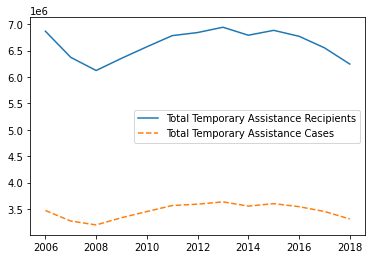

This is the intercept: 195691.6463034246
This is the value of the slope: [0.4928308]
The Pearson Correlation Coefficient is [0.9552324926157665] with a P-value of P = 3.7154268527970283e-07  for Family Assistance Federally Participating Cases and Total Family Assistance Case Closings
This is the intercept: 8365.390699140582
This is the value of the slope: [0.06691968]
The Pearson Correlation Coefficient is [0.9017061528799133] with a P-value of P = 2.5298413541632515e-05  for Family Assistance Federally Participating Cases and Total Family Assistance Case Closings


In [12]:
# plot the total temporary assistance recipients against year and to see increase or decrease
plt.plot('Year', 'Total Temporary Assistance Recipients', label="Total Temporary Assistance Recipients",
         data=pa_case_load_close_year)
plt.plot('Year', 'Total Temporary Assistance Cases', "--", label="Total Temporary Assistance Cases",
         data=pa_case_load_close_year)
plt.legend(loc=0)
plt.show()
plt.close()

linear_regression(pa_case_load_close_year[['Total Temporary Assistance Recipients']],
                  pa_case_load_close_year['Total Temporary Assistance Cases'])

linear_regression(pa_case_load_close_year[['Family Assistance Federally Participating Cases']],
                  pa_case_load_close_year['Total Family Assistance Case Closings'])

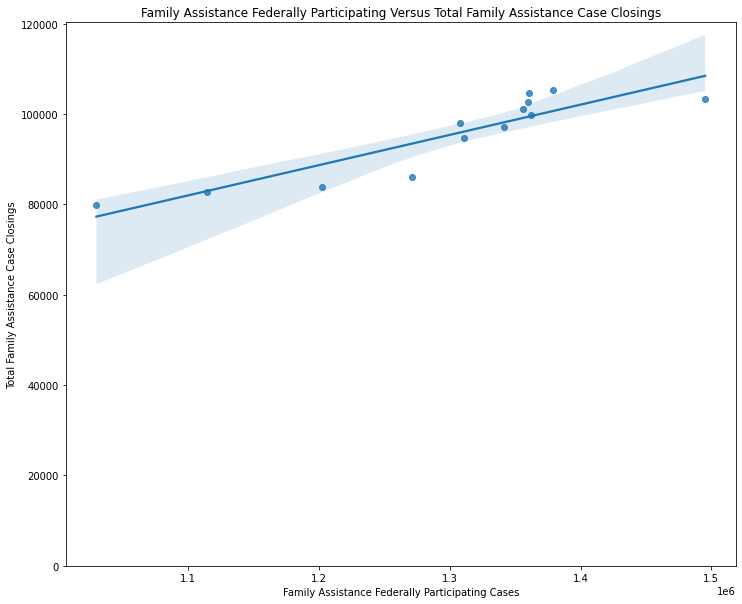

In [13]:
# scatter plot to visualize the correlation between Total Temporary Assistance Recipients
# and Total Temporary Assistance Cases

scatter_plot("Family Assistance Federally Participating Cases",
             "Total Family Assistance Case Closings",
             pa_case_load_close_year,
             "Family Assistance Federally Participating Versus Total Family Assistance Case Closings")

In [14]:
# set up the training data for the predictive model, separating data into training and test
# attempting to predict the family assistance federally participating cases

y_data = pa_case_load_close["Family Assistance Federally Participating Cases"]
x_data = pa_case_load_close.drop("Family Assistance Federally Participating Cases", axis=1)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("Number of test samples: ", x_test1.shape[0])
print("Number of training samples: ", x_train1.shape[0])

# plot a linear regression to help plot the trained and the tested datasets

lr = LinearRegression()
lr.fit(x_train1[['Total Family Assistance Case Closings', 'Total Temporary Assistance Recipients',
                 'Safety Net Federally Non-Participating Expenditures', 'Safety Net Assistance Expenditures']],
       y_train1)

yhat_train = lr.predict(x_train1[['Total Family Assistance Case Closings', 'Total Temporary Assistance Recipients',
                                  'Safety Net Federally Non-Participating Expenditures',
                                  'Safety Net Assistance Expenditures']])

yhat_test = lr.predict(x_test1[['Total Family Assistance Case Closings', 'Total Temporary Assistance Recipients',
                                'Safety Net Federally Non-Participating Expenditures',
                                'Safety Net Assistance Expenditures']])

Number of test samples:  3620
Number of training samples:  5428


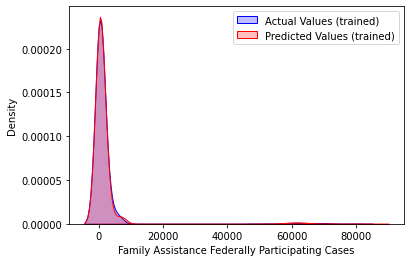

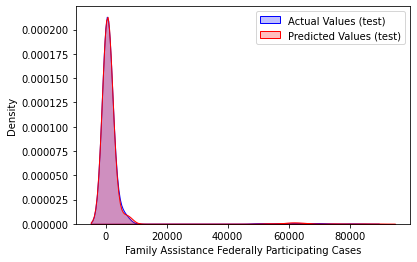

In [15]:
# create plots to help show the difference between the actual and the original

sns.kdeplot(y_train1, label="Actual Values (trained)", shade=True, color="b")
sns.kdeplot(yhat_train, label="Predicted Values (trained)", shade=True, color="r")
plt.legend()
plt.show()
plt.close()

sns.kdeplot(y_test1, label="Actual Values (test)", shade=True, color="b")
sns.kdeplot(yhat_test, label="Predicted Values (test)", shade=True, color="r")
plt.legend()
plt.show()
plt.close()